# Model Optimisation and Conclusion
This notebook will be used for model optimistaion. After which, I will use tools such as the ROC_AUC, classification report and confusion matrix to evaluate the final model.  
After which, based on the statistics from the tools mentioned, a conclusion and recommendation will be presented.  
## Content
* [Import libraries and data](#Import-libraries-and-dataset)
* [Model Optimisation and Implementation](#Model-Optimisation-and-Implementation)
* [Conclusion](#Conclusion)
* [Recommendations](#Recommendations)

## Import libraries and datasets

In [1]:
# Import libraries
import pandas as pd # For placing the data into dataframes for analysis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools as itl
import sklearn
import pickle

from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import train_test_split, cross_val_predict, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, plot_roc_curve, plot_confusion_matrix

# using jupyter magic to display plots in line
%matplotlib inline

In [2]:
# Import training datasets
test = pd.read_csv("../datasets/test_2.csv")
X_train = pd.read_csv("../datasets/X_train.csv") # to check and ensure the columns are the same as the test set

In [3]:
# Check shape of test set
test.shape

(225639, 24)

In [4]:
X_col = test.drop(columns = 'loan_status').columns
X = test[X_col]
y = test['loan_status']

In [5]:
print(X.shape[1])
print(X_train.shape[1])

23
23


In [6]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'inq_last_6mths', 'inq_last_12m',
       'acc_open_past_24mths', 'bc_open_to_buy', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_dti_consol', 'sub_grade_d', 'fico_median',
       'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified'],
      dtype='object')

In [7]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'inq_last_6mths', 'inq_last_12m',
       'acc_open_past_24mths', 'bc_open_to_buy', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_dti_consol', 'sub_grade_d', 'fico_median',
       'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified'],
      dtype='object')

In [8]:
# Check on imported y train
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [9]:
# Check datatype of y_train
y.dtypes

dtype('int64')

In [10]:
# Convert to an array for model
y = np.ravel(y)

In [11]:
# Check shape of y_train data
y.shape

(225639,)

## Model Optimisation and Implementation

In [12]:
# Instantiate the with the best parameters
sgd = SGDClassifier(loss = 'log',
                    penalty = 'elasticnet',
                    class_weight = 'balanced',
                    n_jobs = -1,
                    alpha = 1,
                    l1_ratio = 0)

In [13]:
sgd.fit(X, y)
sgd_pred = sgd.predict(X)

In [14]:
labels = ['Paid Off', 'Defaulted']
print(classification_report(y, sgd_pred, target_names=labels))

              precision    recall  f1-score   support

    Paid Off       0.82      0.87      0.85    177596
   Defaulted       0.39      0.31      0.35     48043

    accuracy                           0.75    225639
   macro avg       0.61      0.59      0.60    225639
weighted avg       0.73      0.75      0.74    225639



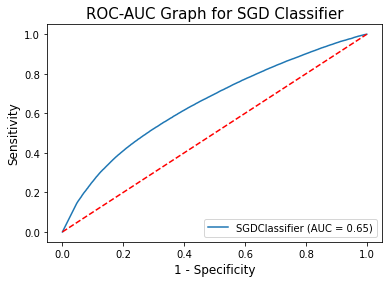

<Figure size 1296x1008 with 0 Axes>

In [15]:
# Plot AUC ROC graph
plot_roc_curve(sgd, X, y)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC-AUC Graph for SGD Classifier', fontsize=15)
plt.xlabel('1 - Specificity', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.figure(figsize = (18,14))
plt.show();

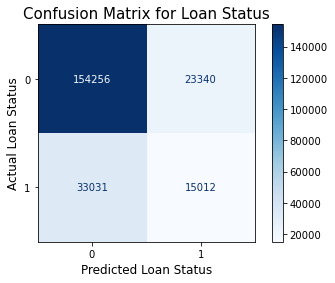

<Figure size 1296x1008 with 0 Axes>

In [16]:
#Plot confusion matrix
plot_confusion_matrix(sgd, X, y, cmap = 'Blues')
plt.title('Confusion Matrix for Loan Status', fontsize=15)
plt.xlabel('Predicted Loan Status', fontsize=12)
plt.ylabel('Actual Loan Status', fontsize=12)
plt.figure(figsize = (18,14))
plt.show();

## Conclusion
Based on the statistics gleaned from the statistics in the classfication report, it can be seen that the model tends to predict loans that will be paid off better. The prediction of loans that will be paid off have a precision score of 0.81, while those which were predicted to be defaulted have a score of only 0.40. This is amplified by the F1 score as the Paid Off label had a score of 0.81 and it is rather lopsided for the defaulted loans. The graphic representation of the aforementioned can be seen from the confusion matrix graph.

In conclusion, this model is more catered towards picking out the loans that can be paid off. This might be more suitable to lenders, especially the conservative ones, as it has a better accuracy in predicting if the loan will be paid off. It can be worked on further to improve its performance and hopefully a better model can be rolled out to help investors avoid loans that will be defaulted.

## Recommendations
As the model does not show a satisfactory accuracy in predicting if the loans will be paid off or defaulted. I would look into improving the model by:
* Using feature engineering to get features improve the accuracy
* Taking timing of the data to better generalise the data used for the model